1. 코드 중에 모르는 부분이 조금이라도 있으면 나만 모르나 걱정말고 물어보기 (1+1=2 물어봐도 됨)
2. 물어봤을 때 대답할 수 있기
3. 전체 코드와 그 코드를 짜기 위한 단계 설명하고 공유하기

# **0.Distant barcodes?**

warehouse(창고)에는 바코드가 줄지어 있는데, 여기서 i번째  barcodes는  barcodes[i]입니다. 

인접한 두 개의  barcodes가 동일하지 않도록 바코드를 다시 정렬하는 문제

-  warehouse에 barcode의 열이 있음
-  두개의 근접한 barcode가 동일하지 않도록
-  답은 무조건 존재

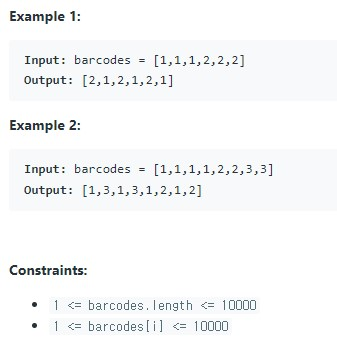

# **1.Max heap**

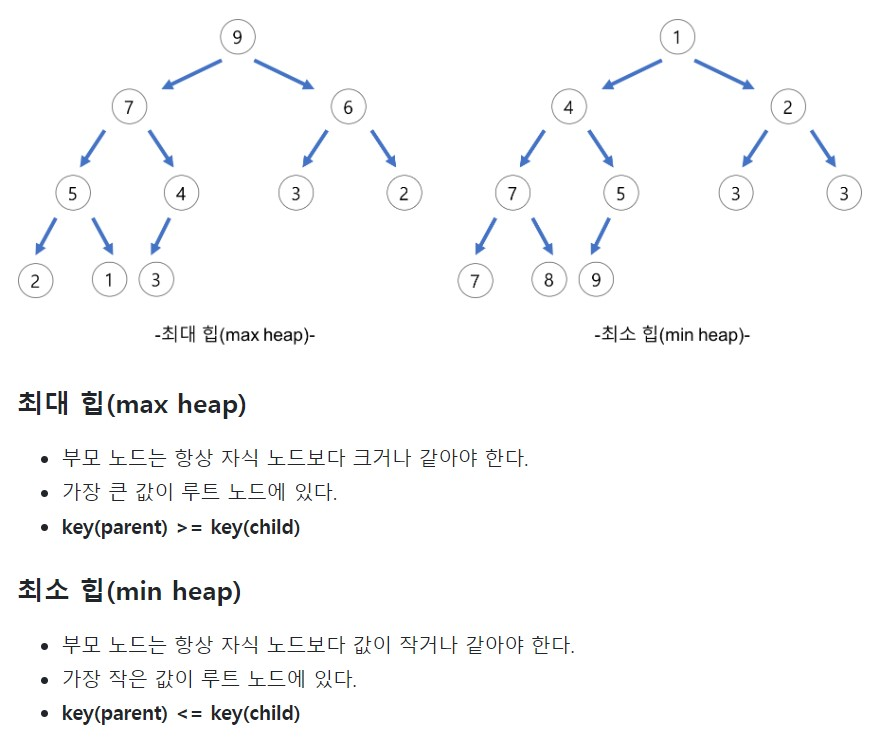

-  MAX HEAP 요약 = 디폴트인 MIN HEAP에다가 -(마이너스)기호 붙이면 된다!

-  heapq.heappush(heap, (-v, k)) # (우선 순위, 값)

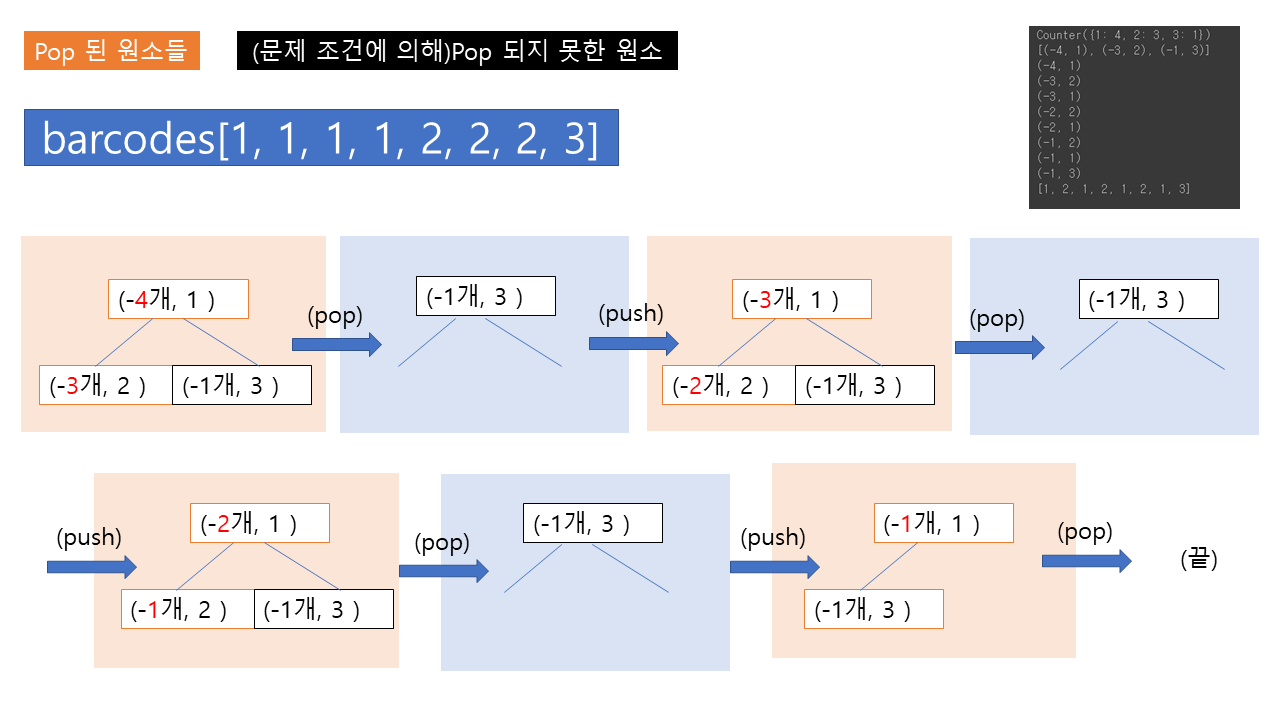

In [ ]:
# 0. 초기 코드
class Solution:
    def rearrangeBarcodes(self, barcodes):
        answer = []
      
        return answer

In [2]:
# 1. 필요 모듈 import
from collections import Counter
import heapq

In [ ]:
# 2. Counter로 빈도수 계산(defaultdict 보다 빠름)
        num_dict = Counter(barcodes)
        
# print(num_dict) = Counter({1: 4, 2: 3, 3: 1}) 

In [3]:
# 3. 빈도 수의 최대 힙 구축
        heap = []
        for k, v in num_dict.items():
            ######## maxheap,이라서v에 - 붙인 것을 확인할 수 있음 ###########
            heapq.heappush(heap, (-v, k))  
# print(heap) = [(-4, 1), (-3, 2), (-1, 3)]

In [ ]:
# 4. 빈도 수가 가장많은 것부터 answer에 append
        while heap:
            # pop 된 원소들 first에 저장
            first = heapq.heappop(heap)  
            # answer가 비었거나, first와 answer[-1]이 같지 않다면 추가
            if len(answer) == 0 or answer[-1] != first[1]:  
                answer.append(first[1])
                if -first[0] > 1:
                    heapq.heappush(heap, (first[0] + 1, first[1]))  ###### item을 heap에 추가
            # 겹칠 경우 두번째것을 집어넣음
            else: 
                second = heapq.heappop(heap)
                answer.append(second[1])
                if -second[0] > 1:
                    heapq.heappush(heap, (second[0] + 1, second[1]))
                heapq.heappush(heap,first)
'''
# print(first)
(-4, 1)
(-3, 1)
(-2, 1)
(-1, 1)
(-1, 3)

# print(second)
(-3, 2)
(-2, 2)
(-1, 2)
'''

In [5]:
# 5. full code
# 혜진님 코드 참고
from collections import Counter
import heapq

class Solution:
    def rearrangeBarcodes(self, barcodes):
        answer = []
        num_dict = Counter(barcodes)
    
        heap = []
        for k, v in num_dict.items():
            heapq.heappush(heap, (-v, k))      

        while heap:
            first = heapq.heappop(heap)
            if len(answer) == 0 or answer[-1] != first[1]: 
                answer.append(first[1])
                if -first[0] > 1:
                    heapq.heappush(heap, (first[0] + 1, first[1]))  
  
            else: 
                second = heapq.heappop(heap)
                answer.append(second[1])
                if -second[0] > 1:
                    heapq.heappush(heap, (second[0] + 1, second[1]))
                heapq.heappush(heap, first)
                
        return answer
p = Solution()
barcodes = [1, 1, 1, 1, 2, 2, 2, 3]
print(p.rearrangeBarcodes(barcodes))

[1, 2, 1, 2, 1, 2, 1, 3]


# **2.Alternative even /odd position**

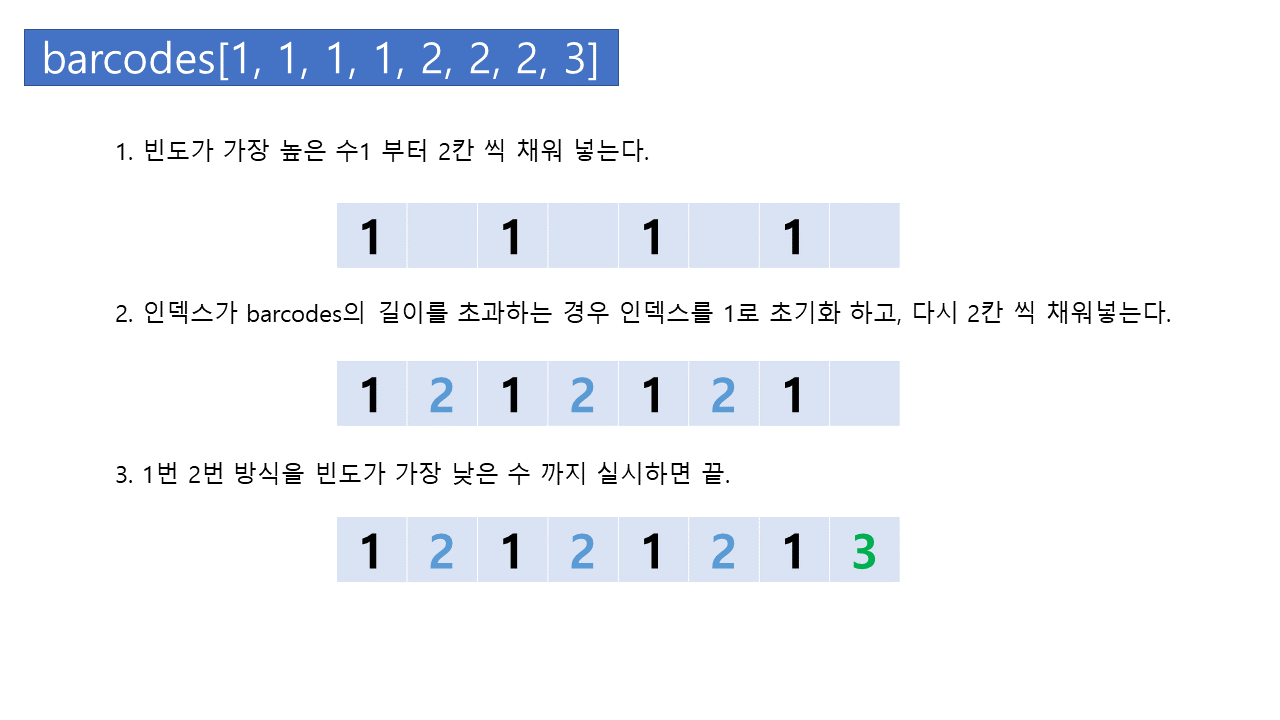

In [ ]:
'''
# 홀수자리(파이썬 index로는 0,2,4...) 먼저 채워주고, 
# 이후에 짝수자리(파이썬 index로는 1,3,5...)를 채워준다
ex) [1, 1, 1, 1, 2, 2, 2, 3] , 빈도가 제일 높은 수 = 1
    [1, _, 1, _, 1, _, 1, _] , 1 먼저 홀수자리에 채운다
    [1, 2, 1, 2, 1, 2, 1, _] , 홀수자리가 다 찼으니 짝수자리에 2를 채운다
    [1, 2, 1, 2, 1, 2, 1, 3] , 남은 자리에 3을 채운다
'''

In [ ]:
# 0. 초기 코드
class Solution:
    def rearrangeBarcodes(self, barcodes):
        answer = []
      
        return answer

# 0.2의 경우 혹은
class Solution:
    def rearrangeBarcodes(self, barcodes: List[int]) -> List[int]:
        answer = []
      
        return answer

In [ ]:
# 1. 필요 모듈 import
from collections import Counter
from typing import List  # python 버전 차이 오류로 추가

In [ ]:
# 2. Counter로 빈도수 계산(defaultdict 보다 빠름)
        num_dict = Counter(barcodes)
        
# print(num_dict) = Counter({1: 4, 2: 3, 3: 1}) 

In [ ]:
# 3. 정답 리스트 요소를 모두 0으로 초기화
        answer = [0] * len(barcodes)
# print(answer) = [0, 0, 0, 0, 0, 0, 0, 0]

In [ ]:
# 4. 0번째 인덱스 부터 2칸씩 저장
#    만약 인덱스가 barcodes 길이를 초과하는 경우 1로 초기화하고 다시 2칸씩 저장
 for x,y in num_dict.most_common():
            for k in range(y):
                if i>=len(barcodes): # 인덱스가 초과하는 경우
                    i = 1  # 1번째 인덱스로 초기화 -> 2칸씩 다시시작
                answer[i] = x  # 0번째 인덱스부터 
                i += 2  # 2칸 증가   
        return answer

In [17]:
# 5. full code
# 엄정민님 코드 참고

from collections import Counter
from typing import List

class Solution:
    def rearrangeBarcodes(self, barcodes: List[int]) -> List[int]:
        answer = [0] * len(barcodes) # 정답 리스트 요소를 모두 0으로 초기화. 길이는 barcodes와 동일
        num_dict = Counter(barcodes) # 숫자별로 몇개가 있는지 dict형태로 저장
        i = 0 # answer의 인덱스
        print(answer)

        for x,y in num_dict.most_common():
            for k in range(y):
                if i>=len(barcodes): # answer 인덱스 i가 barcodes 길이 이상이면 1로 초기화
                    i = 1  # 1번째 인덱스부터 다시 2칸씩 저장
                # 숫자가 많은 것을 0번째 인덱스 부터 2칸씩 정답 리스트에 저장
                answer[i] = x  
                i += 2   
        return answer
p = Solution()
barcodes = [1, 1, 1, 1, 2, 2, 2, 3]
print(p.rearrangeBarcodes(barcodes))

[0, 0, 0, 0, 0, 0, 0, 0]
[1, 2, 1, 2, 1, 2, 1, 3]
